In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import os
import tensorflow as tf
from keras.utils import to_categorical
from keras.utils import load_img, img_to_array
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten,Conv2D, BatchNormalization,Activation,MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
train_dir = 'Data/train'
test_dir = 'Data/test'


In [7]:
def createdataFrame(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)

        print(label,'done')
    return image_paths,labels


In [8]:
train = pd.DataFrame()
train['image'], train['label'] = createdataFrame(train_dir)

angry done
disgusted done
fearful done
happy done
neutral done
sad done
surprised done


In [9]:
print(train)

                                image      label
0            Data/train\angry\im0.png      angry
1            Data/train\angry\im1.png      angry
2           Data/train\angry\im10.png      angry
3          Data/train\angry\im100.png      angry
4         Data/train\angry\im1000.png      angry
...                               ...        ...
28704  Data/train\surprised\im995.png  surprised
28705  Data/train\surprised\im996.png  surprised
28706  Data/train\surprised\im997.png  surprised
28707  Data/train\surprised\im998.png  surprised
28708  Data/train\surprised\im999.png  surprised

[28709 rows x 2 columns]


In [10]:
test = pd.DataFrame()
test['image'], test['label'] = createdataFrame(test_dir)

angry done
disgusted done
fearful done
happy done
neutral done
sad done
surprised done


In [11]:
print(test)

                             image      label
0          Data/test\angry\im0.png      angry
1          Data/test\angry\im1.png      angry
2         Data/test\angry\im10.png      angry
3        Data/test\angry\im100.png      angry
4        Data/test\angry\im101.png      angry
...                            ...        ...
7173  Data/test\surprised\im95.png  surprised
7174  Data/test\surprised\im96.png  surprised
7175  Data/test\surprised\im97.png  surprised
7176  Data/test\surprised\im98.png  surprised
7177  Data/test\surprised\im99.png  surprised

[7178 rows x 2 columns]


In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features 

In [13]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [14]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [15]:
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [16]:
model = Sequential()

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape =(48,48,1) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7,activation='softmax'))



c:\Users\Soham R\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics= ['accuracy'])


In [18]:
model.fit(x= np.array(x_train),y= np.array(y_train),batch_size=128, epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 102s 446ms/step - accuracy: 0.2350 - loss: 1.8382 - val_accuracy: 0.2471 - val_loss: 1.8133
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 93s 413ms/step - accuracy: 0.2536 - loss: 1.8147 - val_accuracy: 0.2473 - val_loss: 1.8029
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 92s 409ms/step - accuracy: 0.2631 - loss: 1.7811 - val_accuracy: 0.3150 - val_loss: 1.7024
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 93s 415ms/step - accuracy: 0.3134 - loss: 1.6956 - val_accuracy: 0.3979 - val_loss: 1.5412
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 95s 420ms/step - accuracy: 0.3834 - loss: 1.5810 - val_accuracy: 0.4383 - val_loss: 1.4575
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 94s 416ms/step - accuracy: 0.4283 - loss: 1.4872 - val_accuracy: 0.4815 - val_loss: 1.3489
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 95s 421ms/step - accuracy: 0.4444 - loss: 1.4256 - val_accuracy: 0.5091 - val_loss: 1.3032
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 436ms/step - accuracy: 0.4697 

In [19]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [22]:
model.save_weights("emotiondetectorweights.weights.h5")

In [1]:
from keras.models import load_model

In [28]:
newmodel = load_model('emotiondetector3.h5')
newmodel.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics= ['accuracy'])
history = newmodel.fit(x= np.array(x_train),y= np.array(y_train),batch_size=128, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 126s 543ms/step - accuracy: 0.7629 - loss: 0.6656 - val_accuracy: 0.6361 - val_loss: 1.0279
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 127s 565ms/step - accuracy: 0.7610 - loss: 0.6737 - val_accuracy: 0.6406 - val_loss: 1.0261
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 126s 562ms/step - accuracy: 0.7576 - loss: 0.6722 - val_accuracy: 0.6413 - val_loss: 1.0281
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 126s 560ms/step - accuracy: 0.7711 - loss: 0.6350 - val_accuracy: 0.6407 - val_loss: 1.0167
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 122s 543ms/step - accuracy: 0.7607 - loss: 0.6620 - val_accuracy: 0.6427 - val_loss: 1.0399
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 121s 537ms/step - accuracy: 0.7679 - loss: 0.6532 - val_accuracy: 0.6456 - val_loss: 1.0177
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 125s 556ms/step - accuracy: 0.7666 - loss: 0.6507 - val_accuracy: 0.6371 - val_loss: 1.0254
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 116s 514ms/step - accuracy: 0.7734 -

In [29]:
model_json = newmodel.to_json()
with open("emotiondetector4.json",'w') as json_file:
    json_file.write(model_json)
newmodel.save("emotiondetector4.h5")

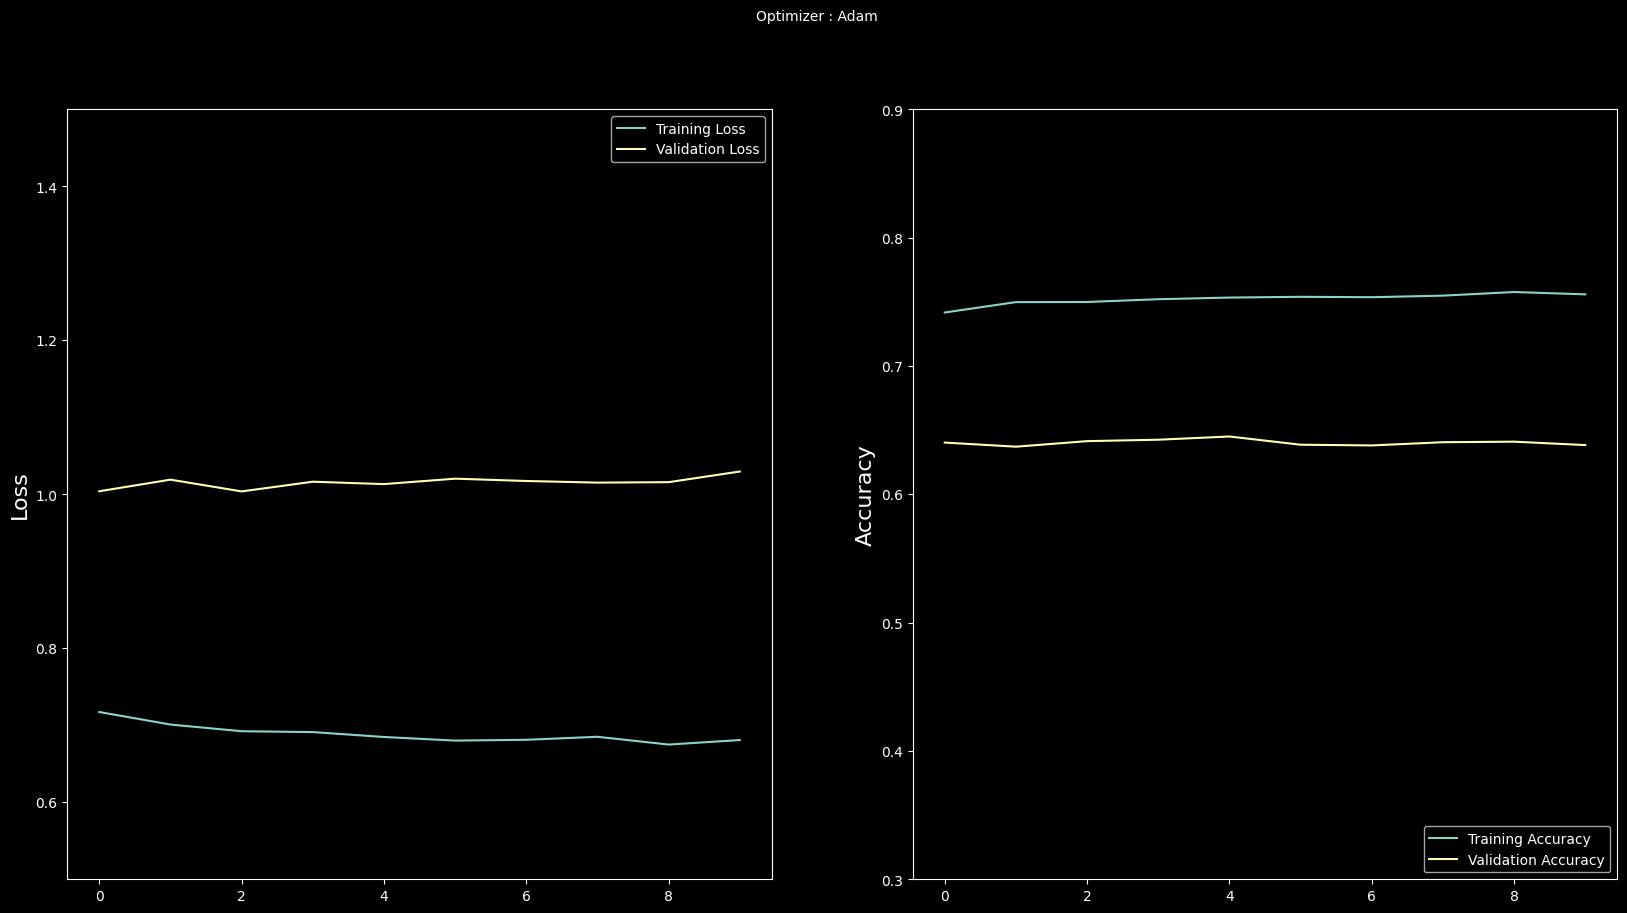

In [26]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)

# Define fixed y-axis range for loss (replace with your desired values)
plt.ylim(0.5, 1.5)  # Adjust these values as needed

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)

# Define fixed y-axis range for accuracy (replace with your desired values)
plt.ylim(0.3, 0.9)  # Adjust these values as needed

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [30]:
newmodel.save_weights("emotiondetector5.weights.h5")